# Analysis of Small MC Simulation on Network Structures with Evolutionary Model

Ran evolutionary model on some network structures (see below) with agent choosing strategies using beliefs and direct action.

Plots payoffs, beleifs across MC steps.

In [4]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import networkx as nx
import json

# Graphs

In [2]:
def draw_graph_circular(graph, number_of_agents, number_of_0_tags):
        agent_0_colour = "#ff0000" # Red
        agent_1_colour = "#0000ff" # Blue
        nx.drawing.nx_pylab.draw_networkx(
            graph, pos=nx.drawing.layout.circular_layout(graph),
            nodelist=[i for i in range(number_of_agents)],
            node_color=[agent_0_colour if i < number_of_0_tags else
                        agent_1_colour for i in range(number_of_agents)],
            with_labels=True)
        plt.show()

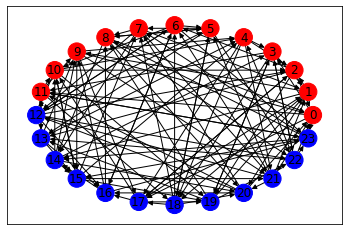

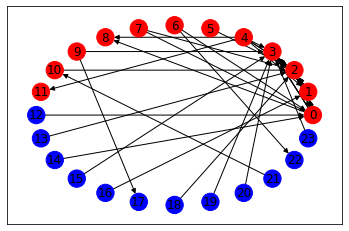

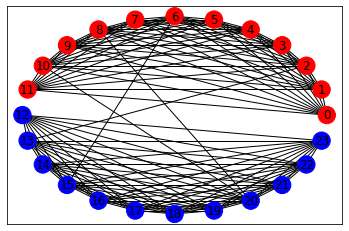

In [6]:
graphs = ["gerrymandered.json", "scale_free.json", "two_communities.json"]

for graph_file_name in graphs:
    with open(graph_file_name, 'r') as graph_file:
        graph = nx.readwrite.json_graph.node_link_graph(json.load(graph_file))
        draw_graph_circular(graph, 24, 12)

# Analysis

In [16]:
def mc_mean_variance(df, first, last):
    data = df.loc[:, pd.IndexSlice[:, first:last]]
    mean_within_MC_steps = data.mean(axis=1, level=0)
    mean_across_MC_steps = mean_within_MC_steps.mean(axis=1)
    variance_across_MC_steps = mean_within_MC_steps.sub(mean_across_MC_steps, axis=0).pow(2).mean(axis=1)
    return mean_across_MC_steps, variance_across_MC_steps

################## Graph = gerrymandered, Ingroup = 0.99, Outgroup = 0.01 ####################


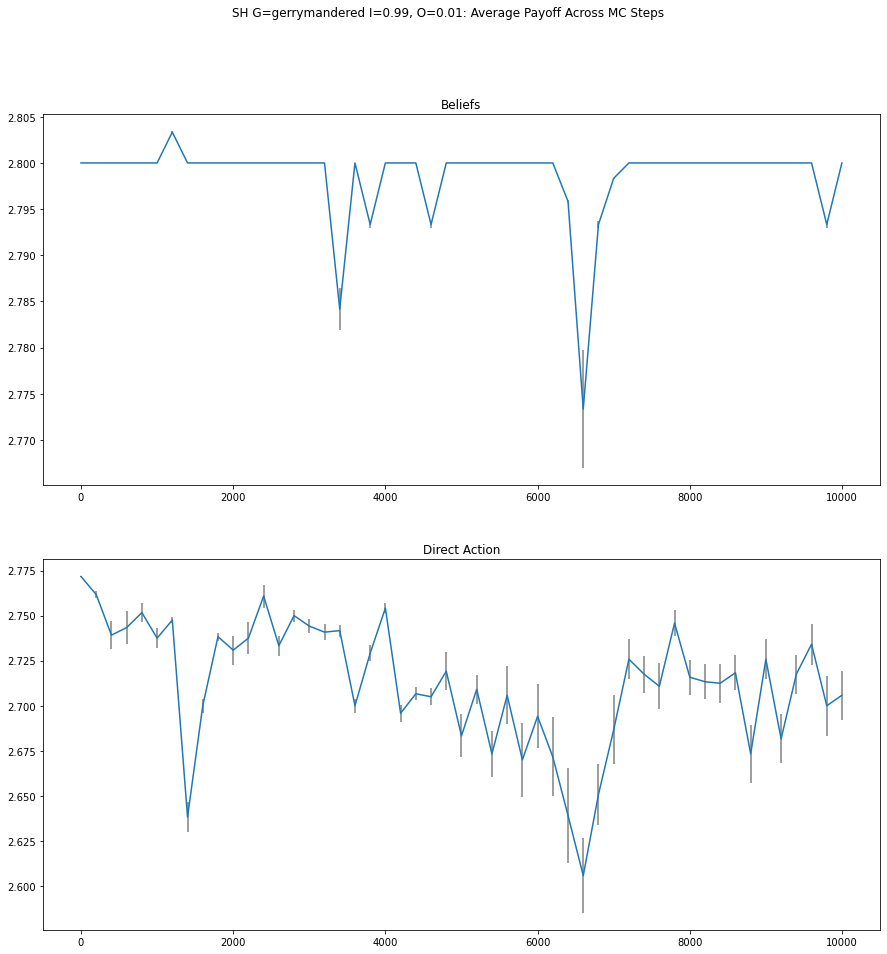

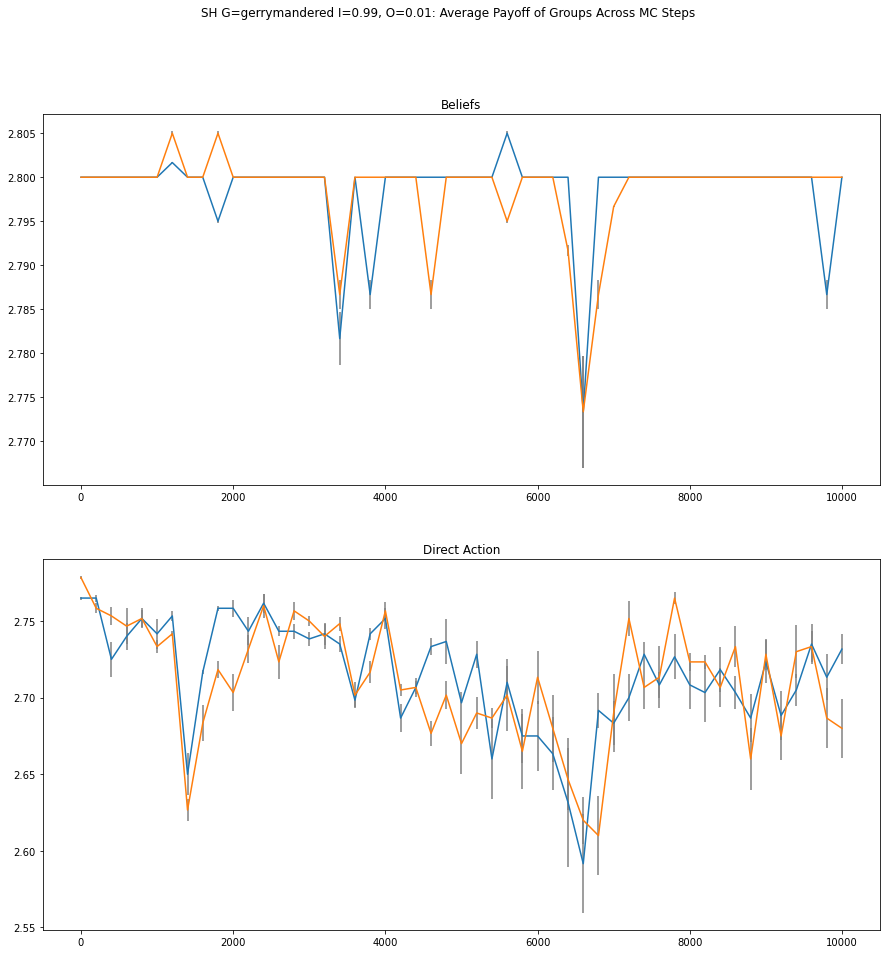

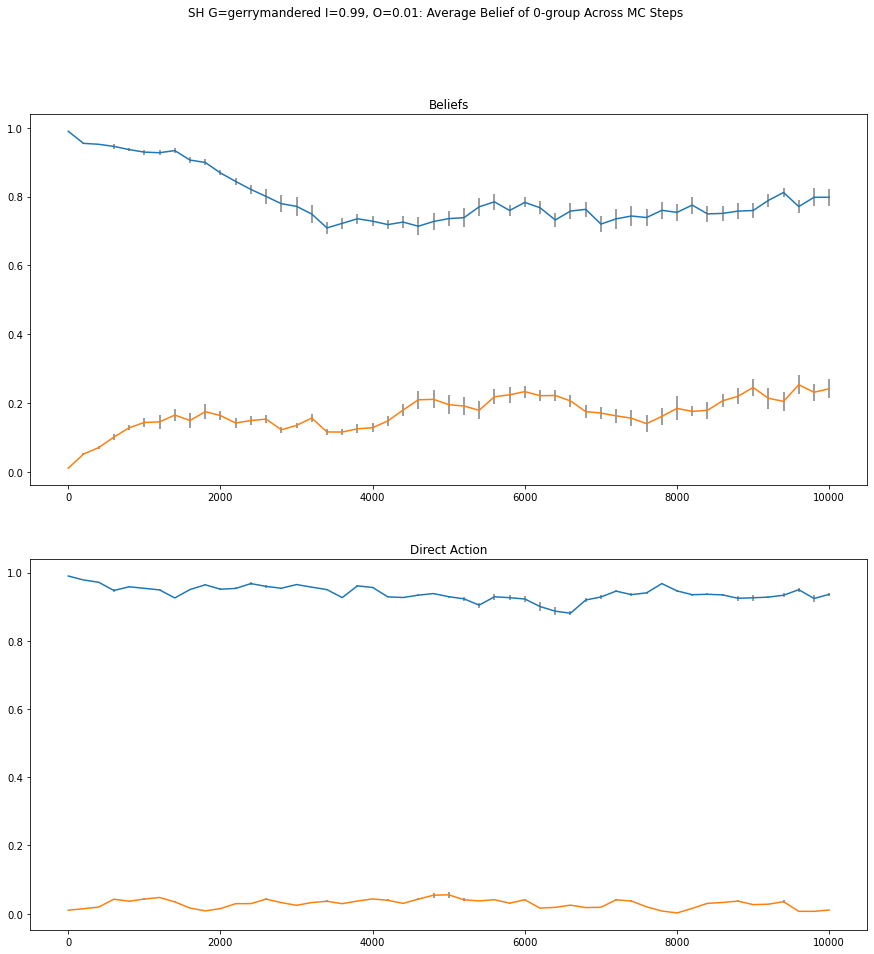

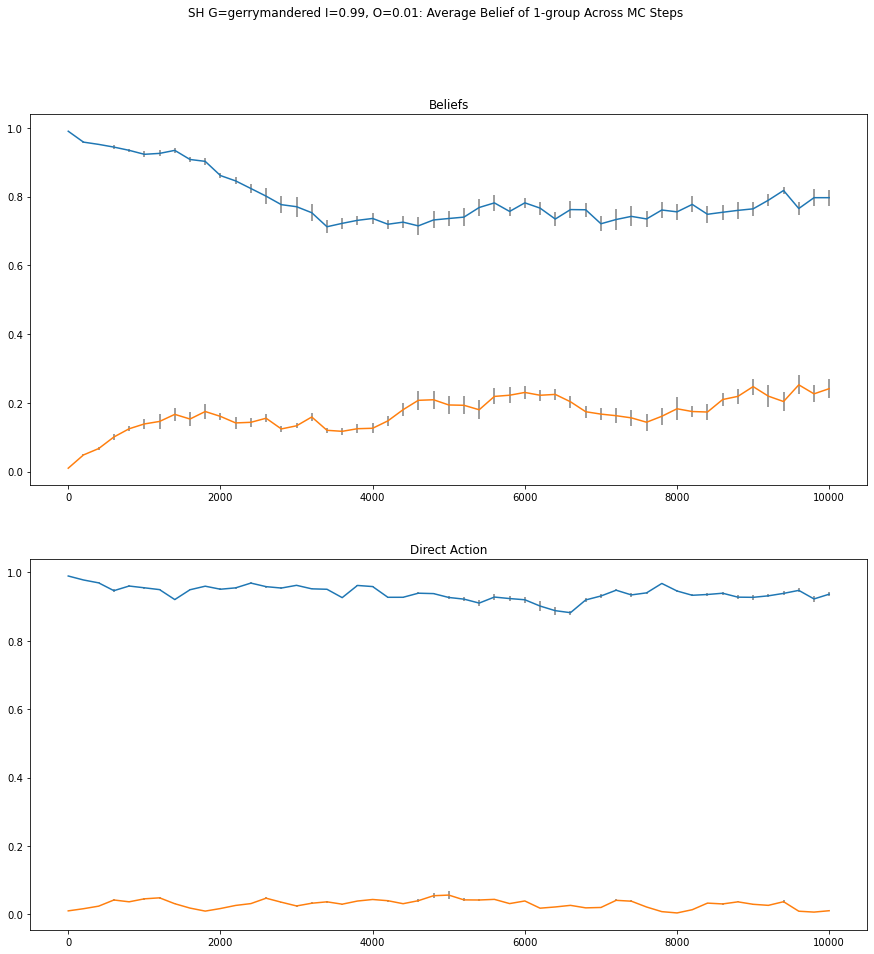

################## Graph = scale_free, Ingroup = 0.99, Outgroup = 0.01 ####################


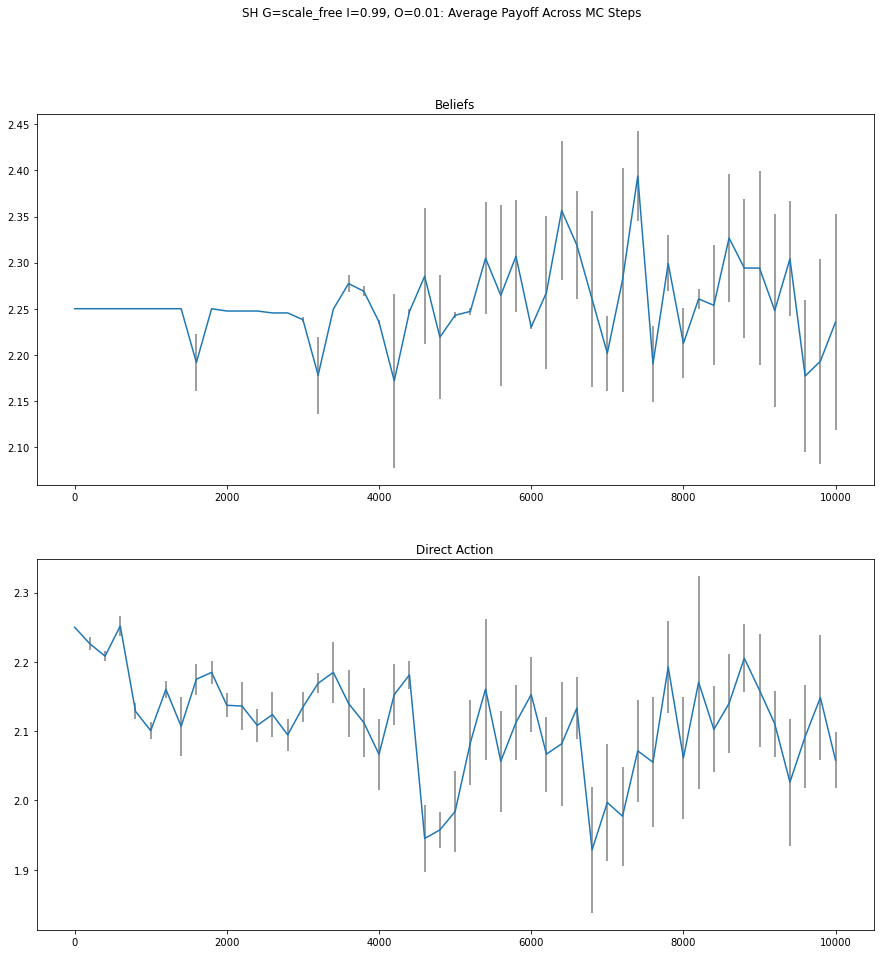

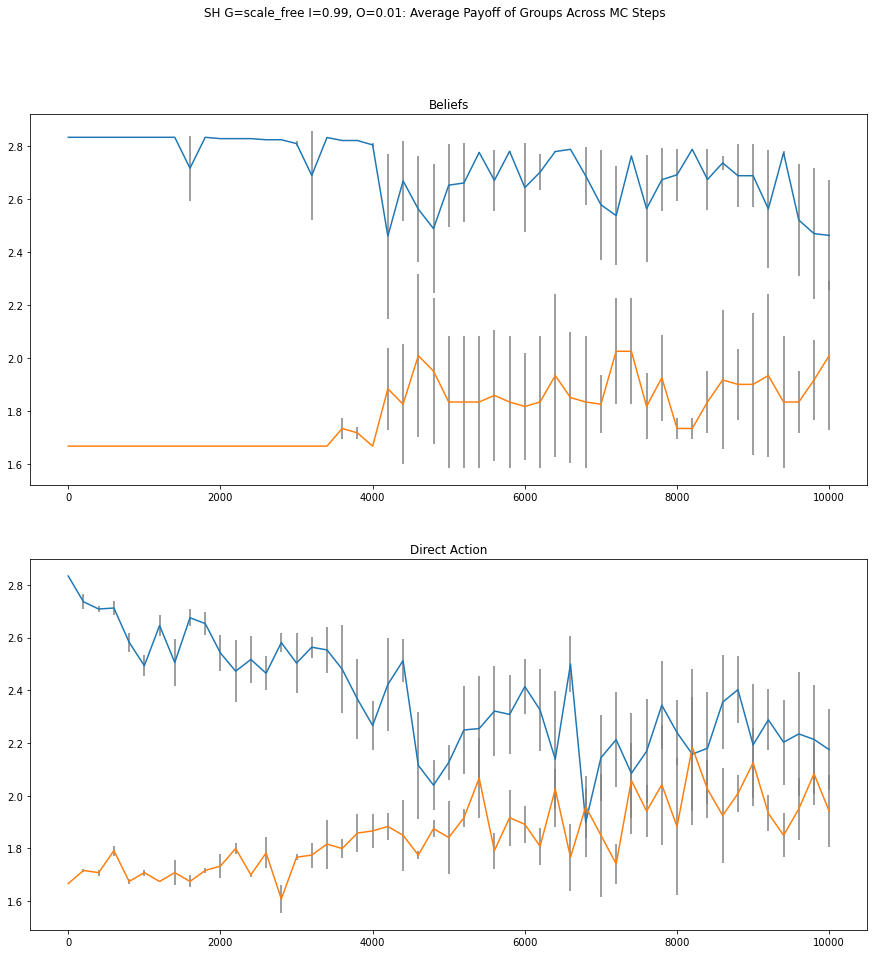

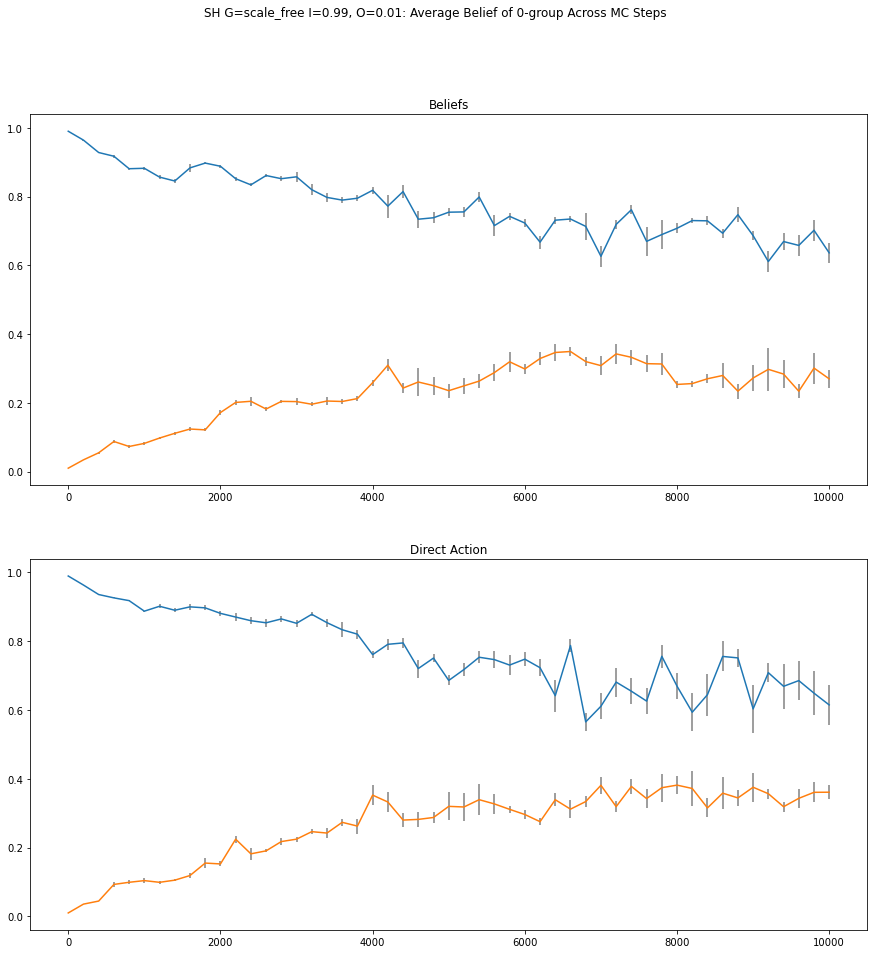

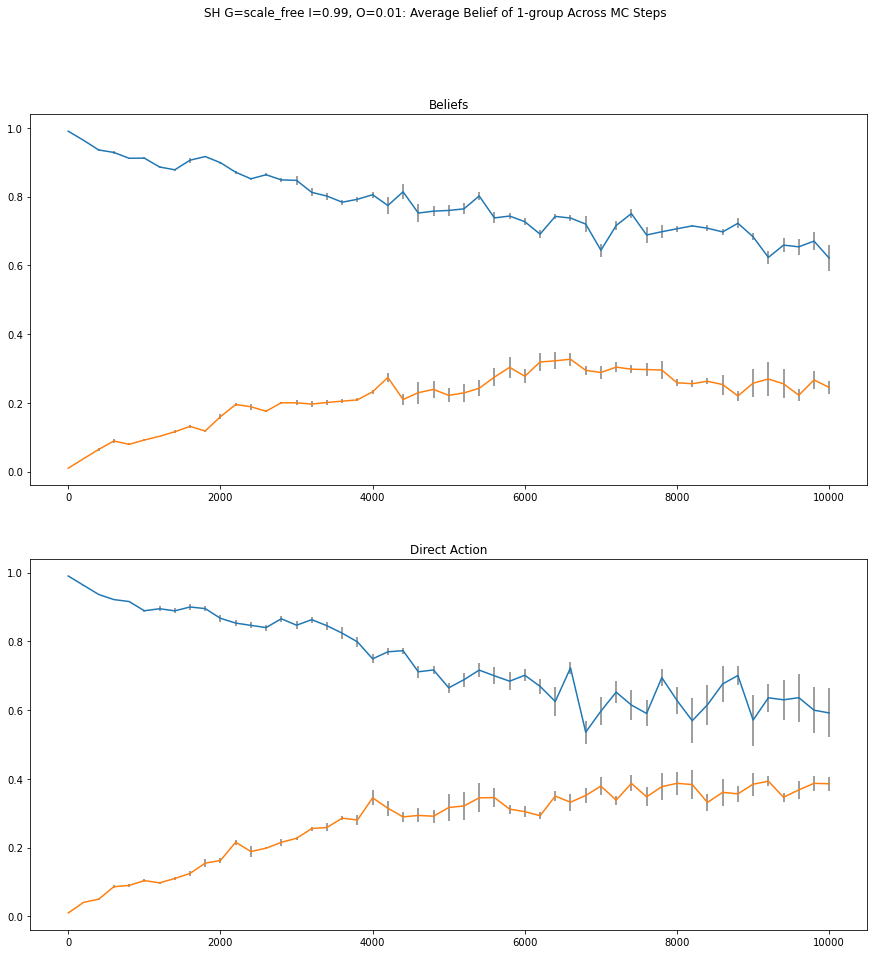

################## Graph = two_communities, Ingroup = 0.99, Outgroup = 0.01 ####################


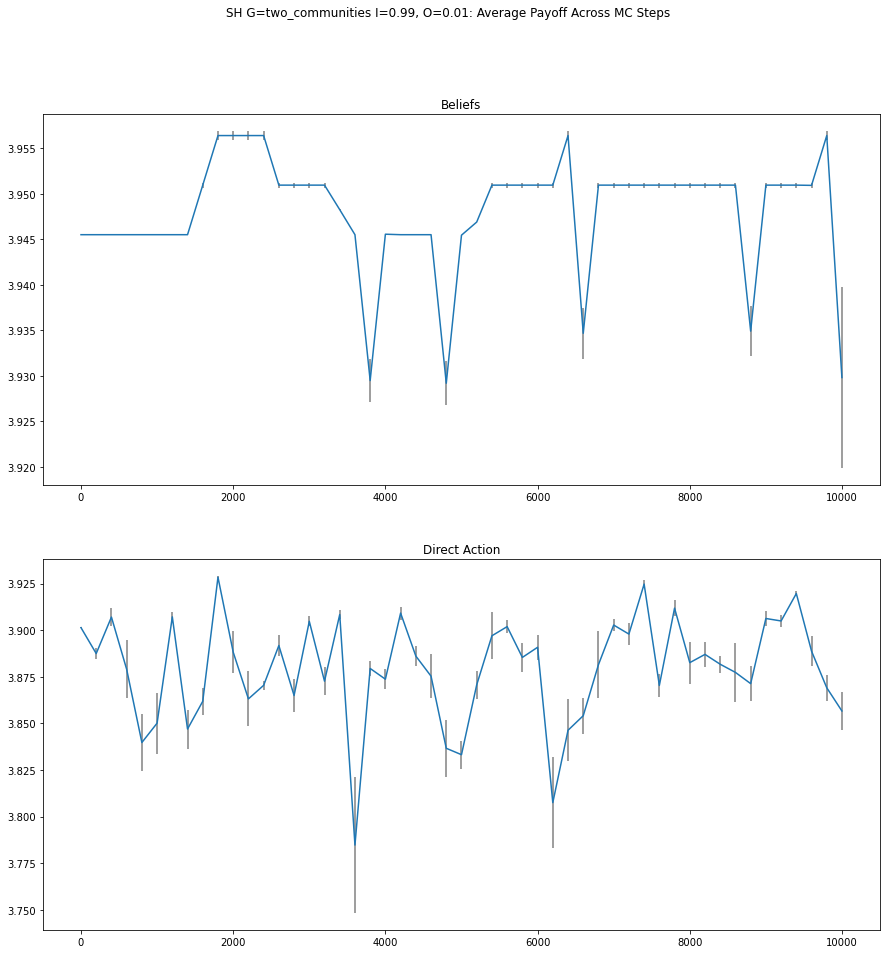

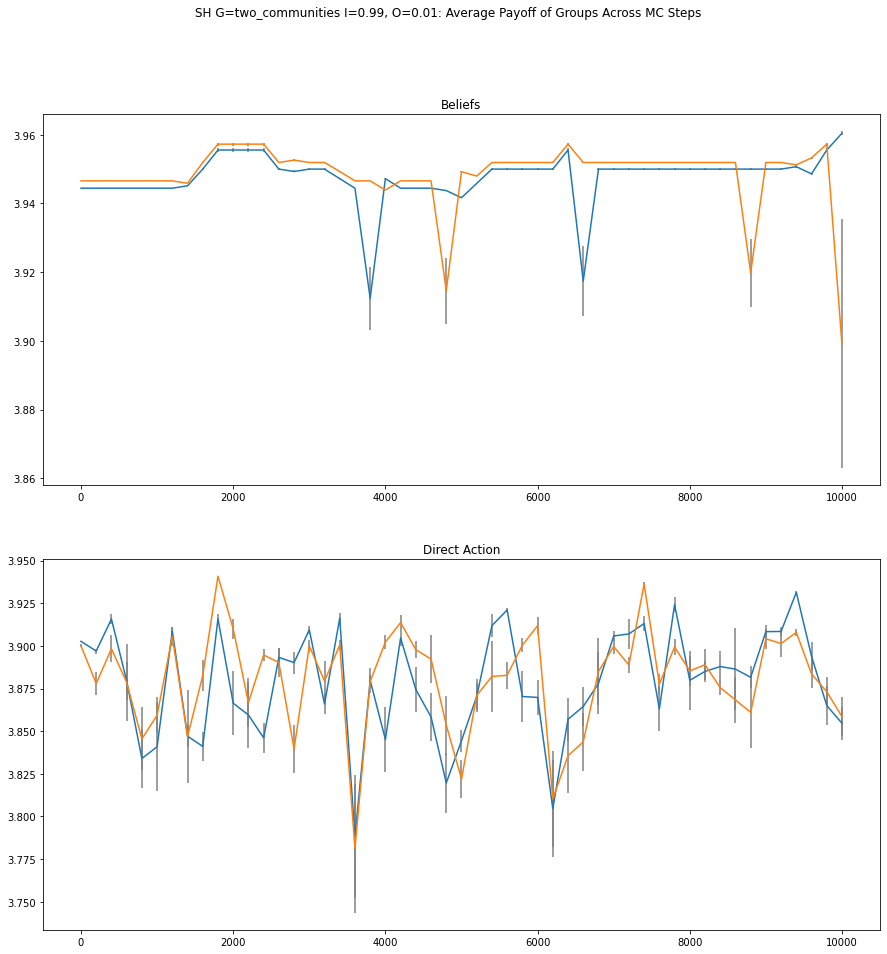

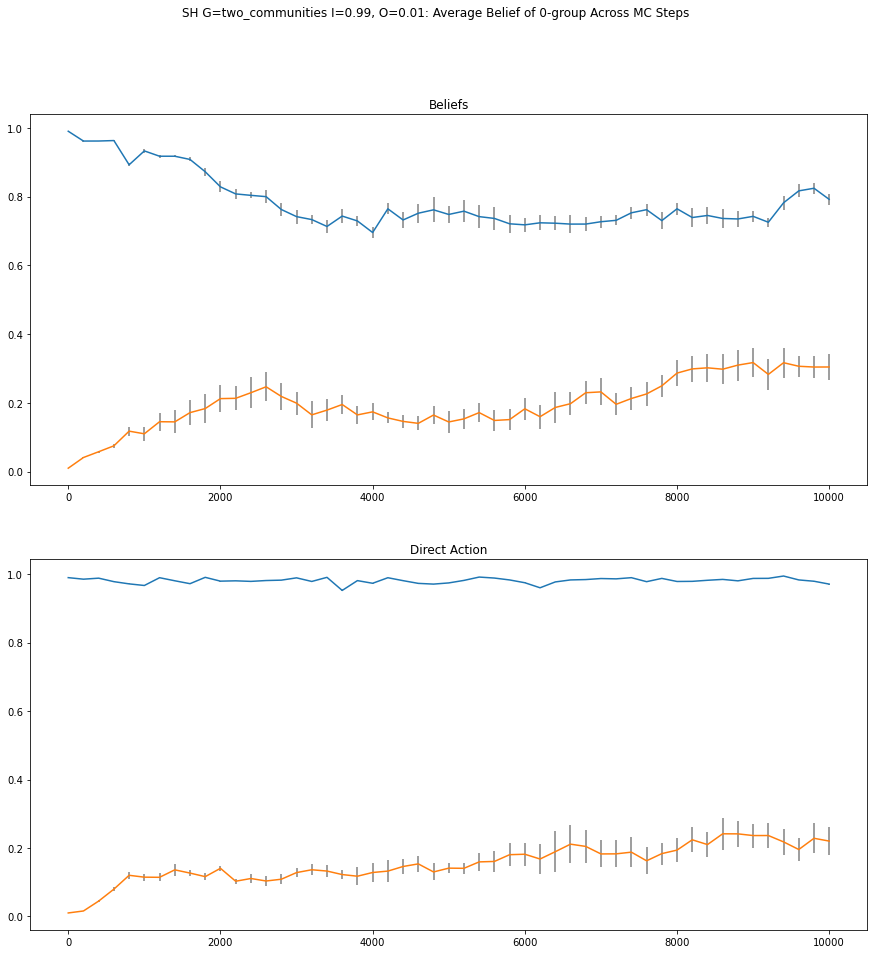

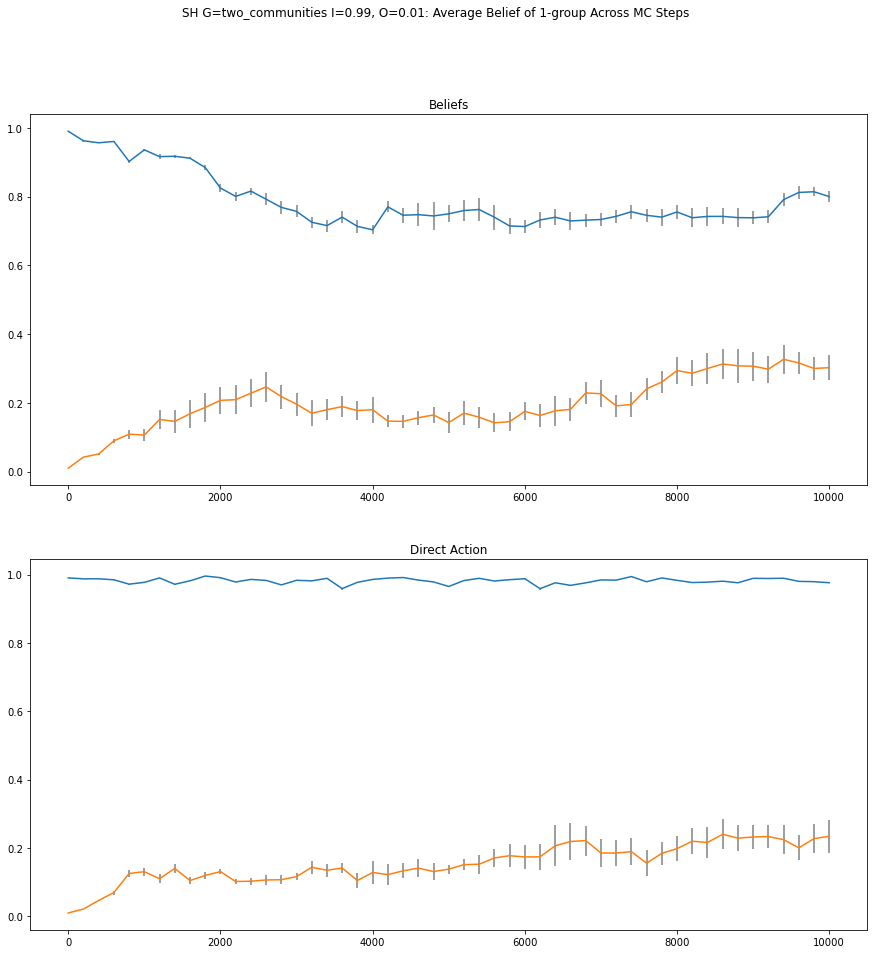

################## Graph = gerrymandered, Ingroup = 0.9, Outgroup = 0.9 ####################


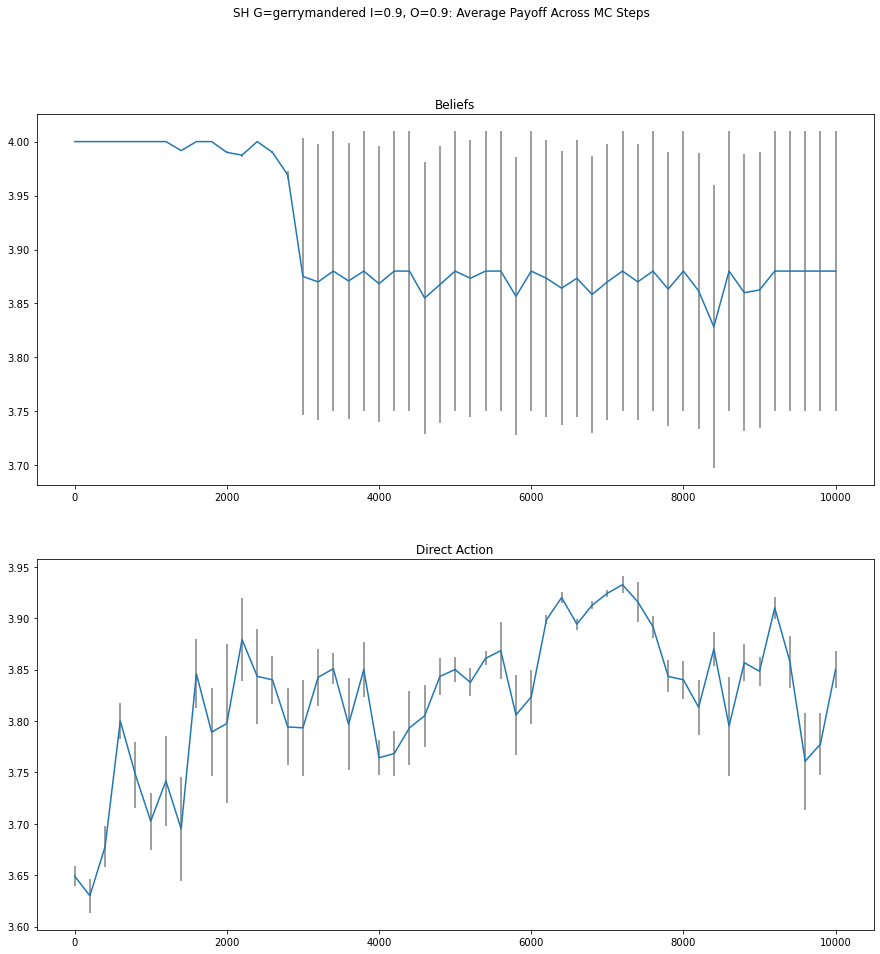

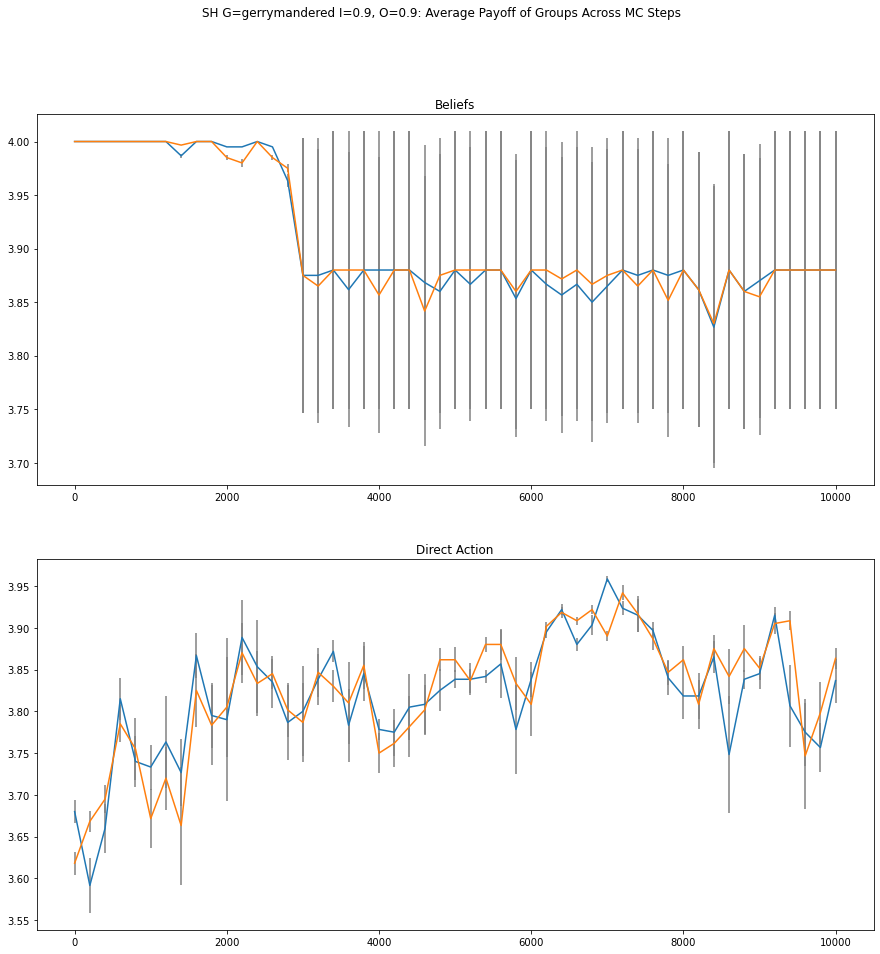

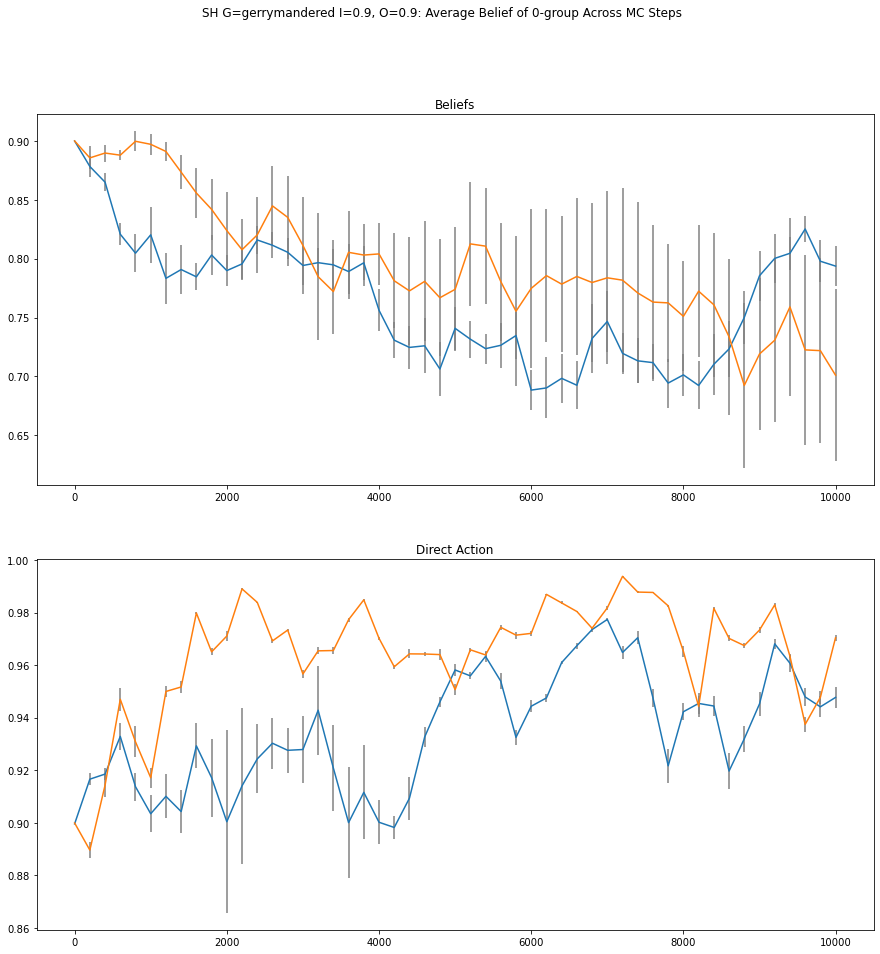

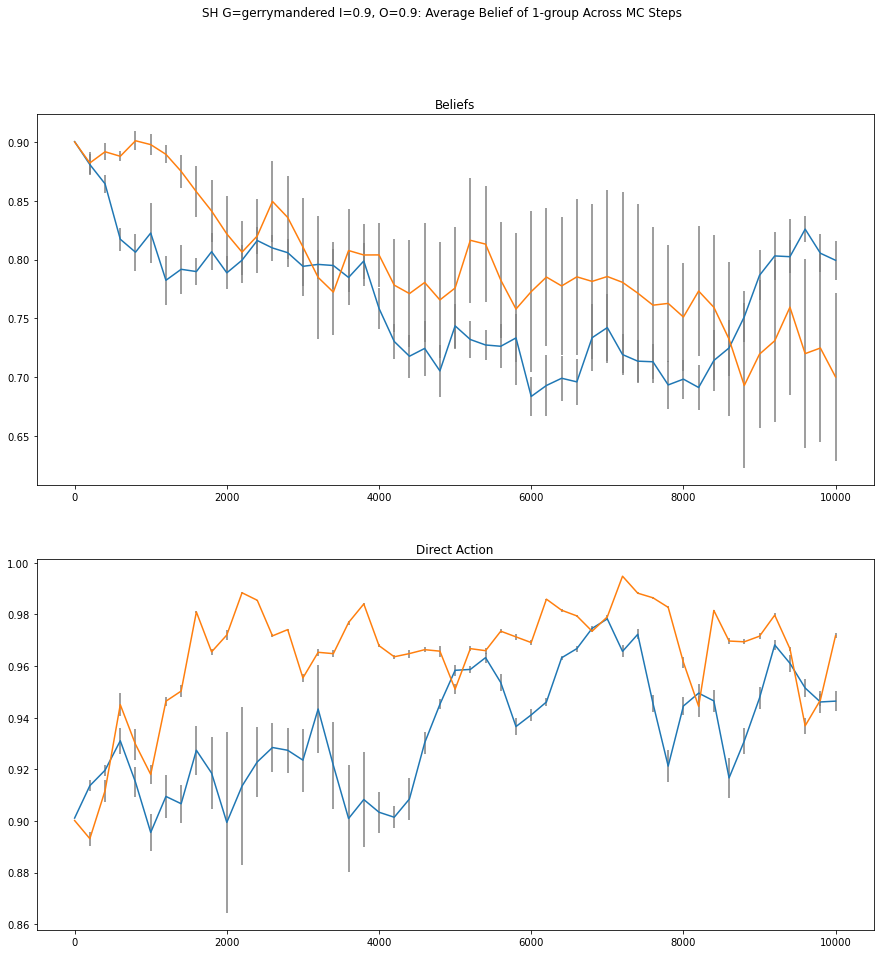

################## Graph = scale_free, Ingroup = 0.9, Outgroup = 0.9 ####################


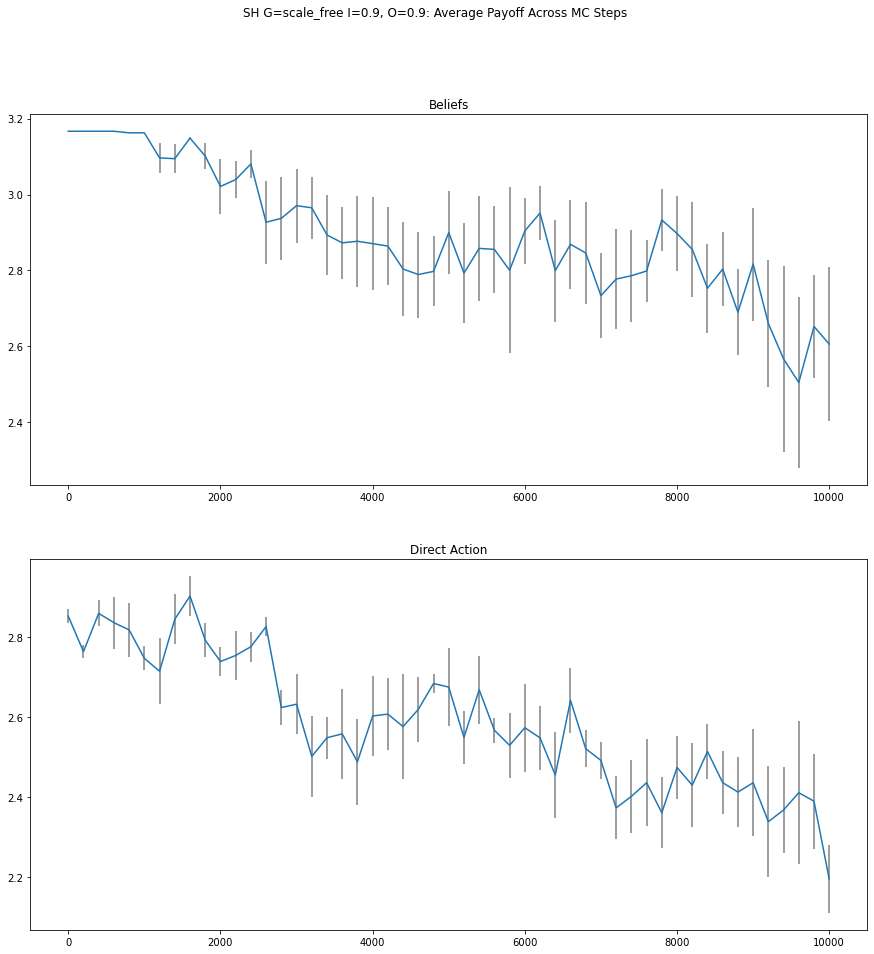

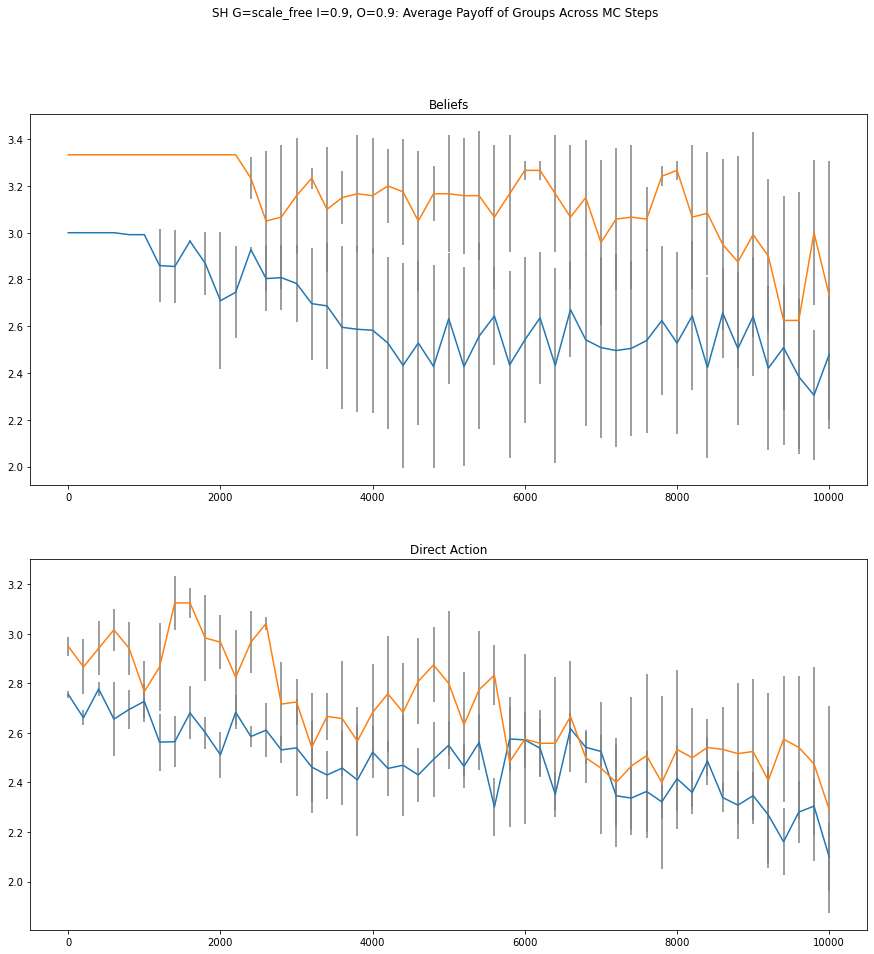

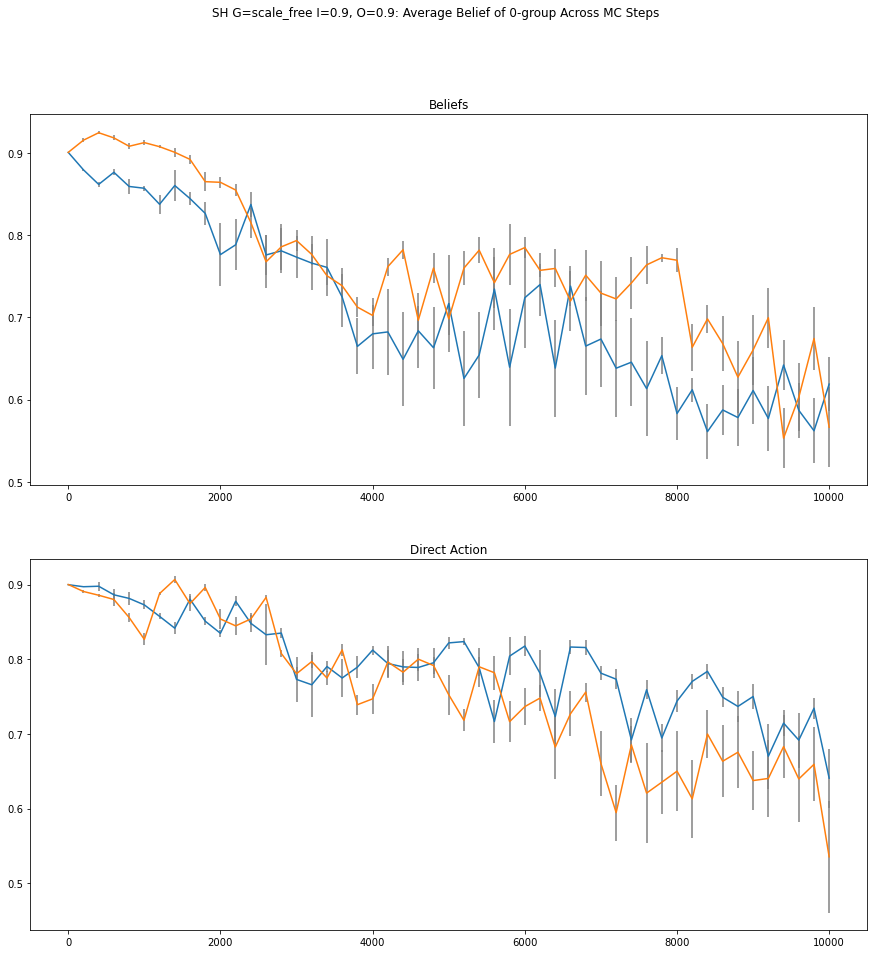

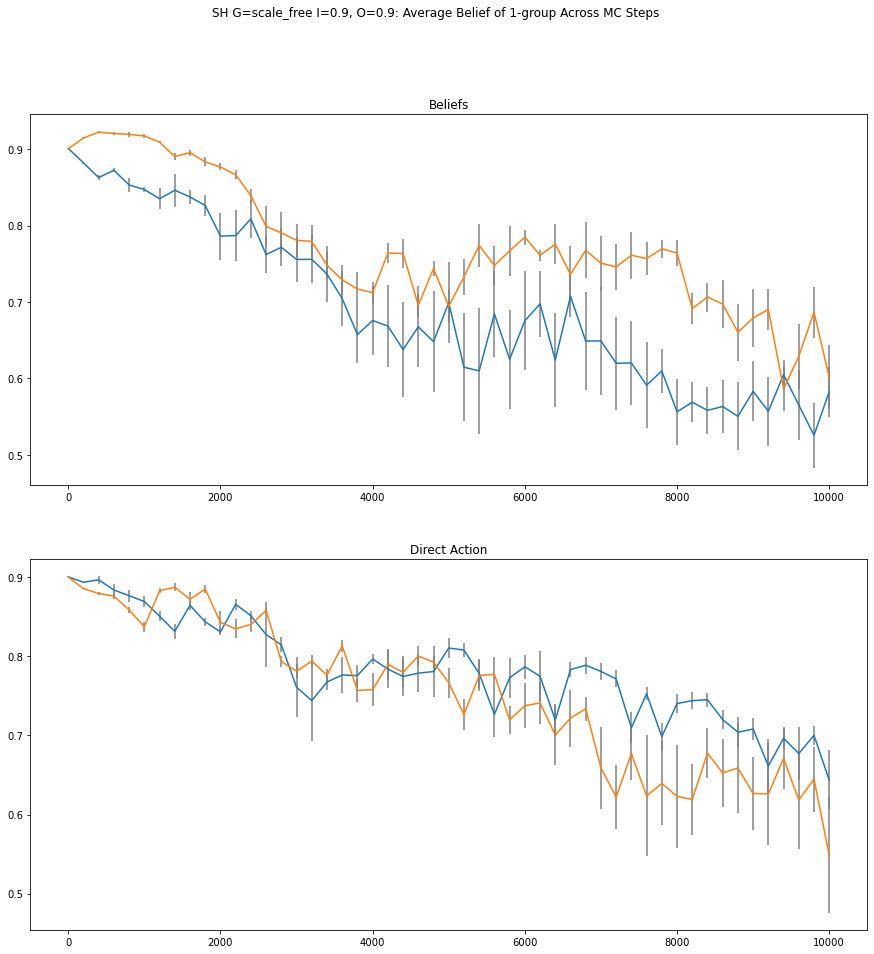

################## Graph = two_communities, Ingroup = 0.9, Outgroup = 0.9 ####################


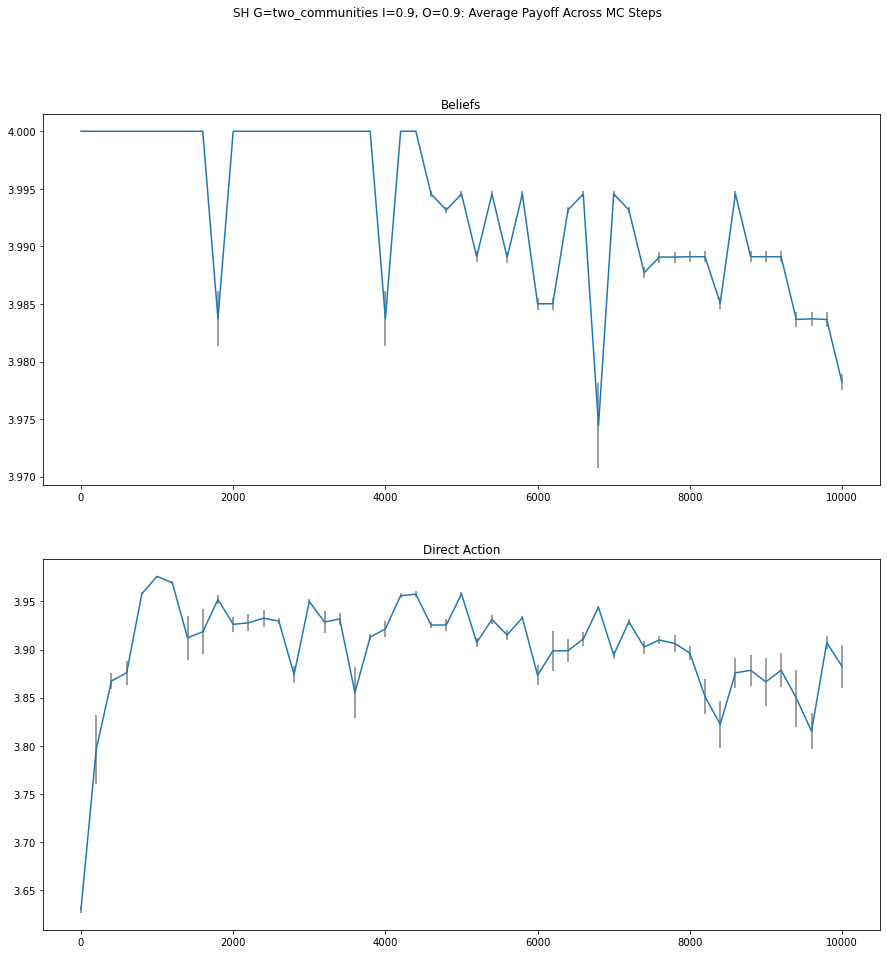

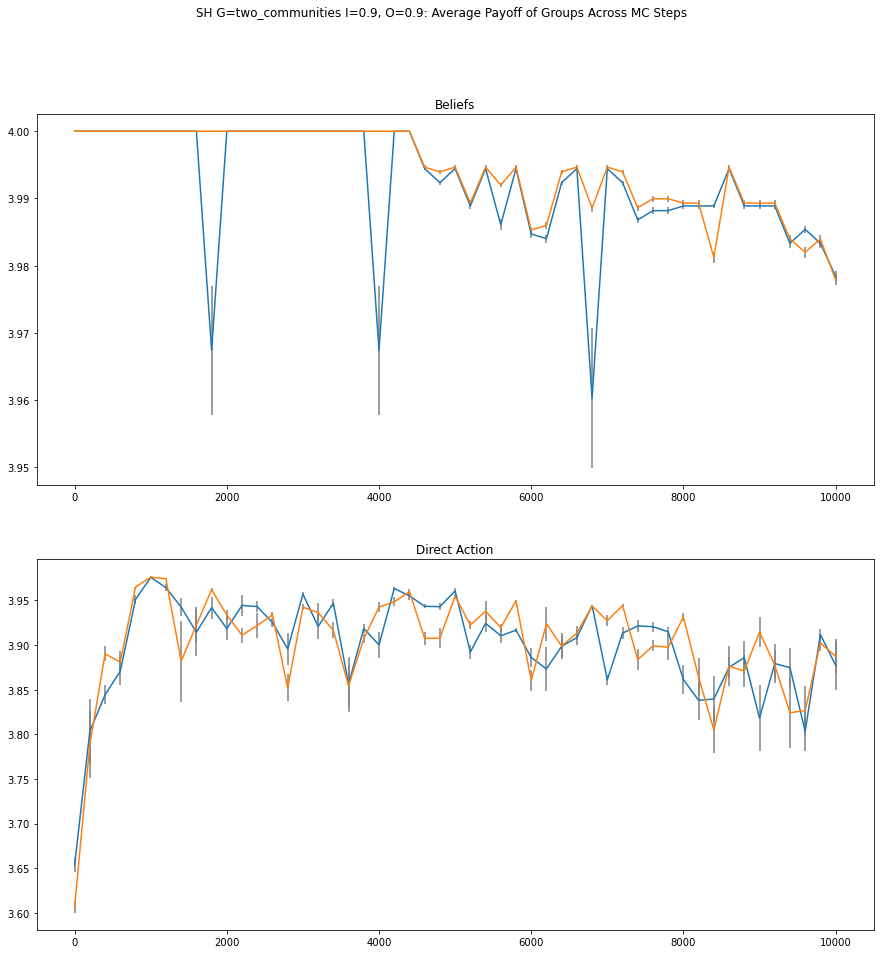

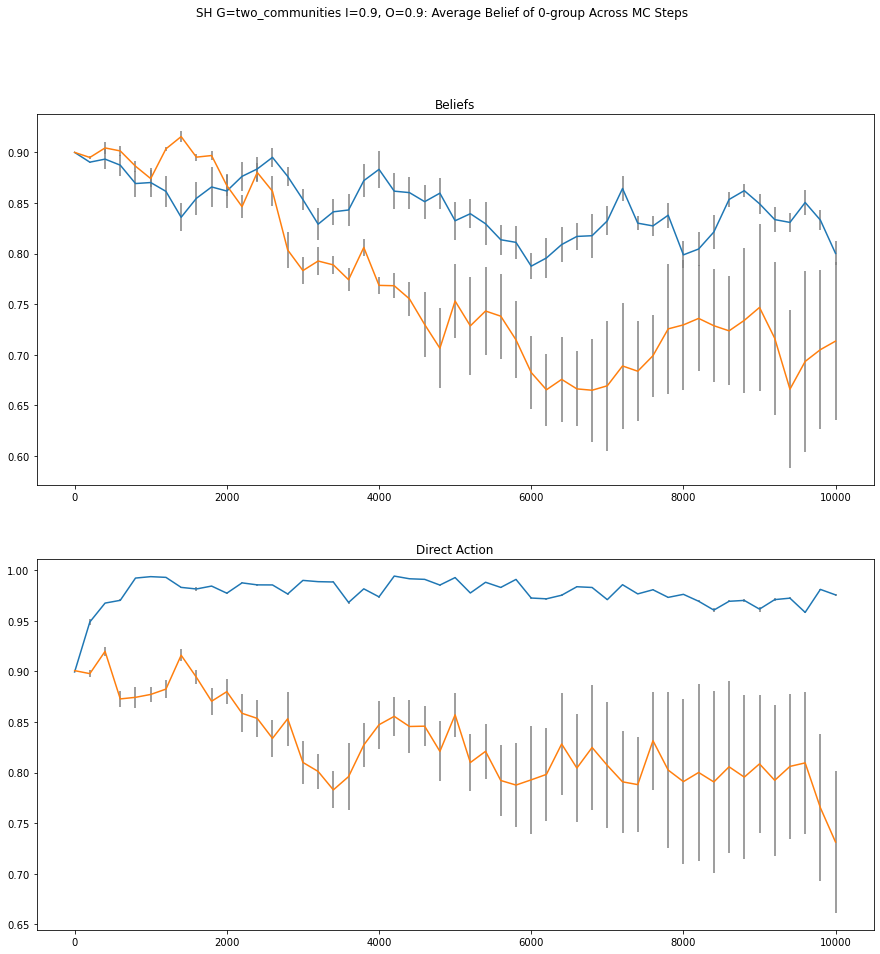

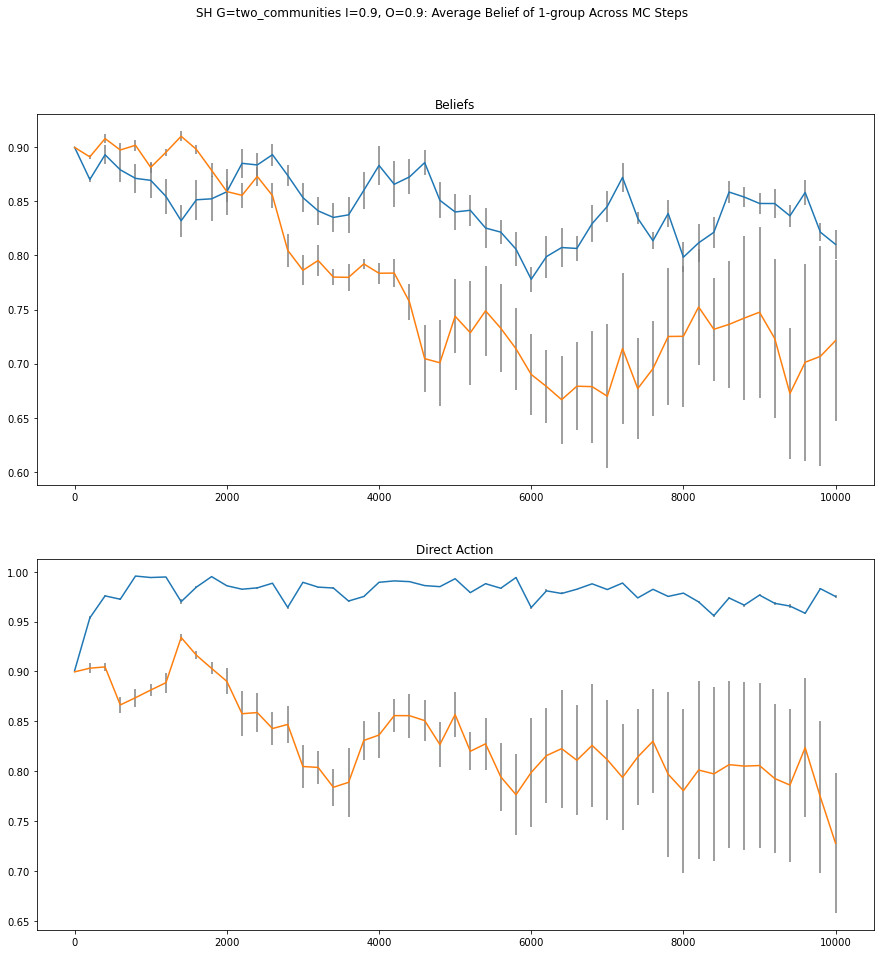

################## Graph = gerrymandered, Ingroup = 0.5, Outgroup = 0.5 ####################


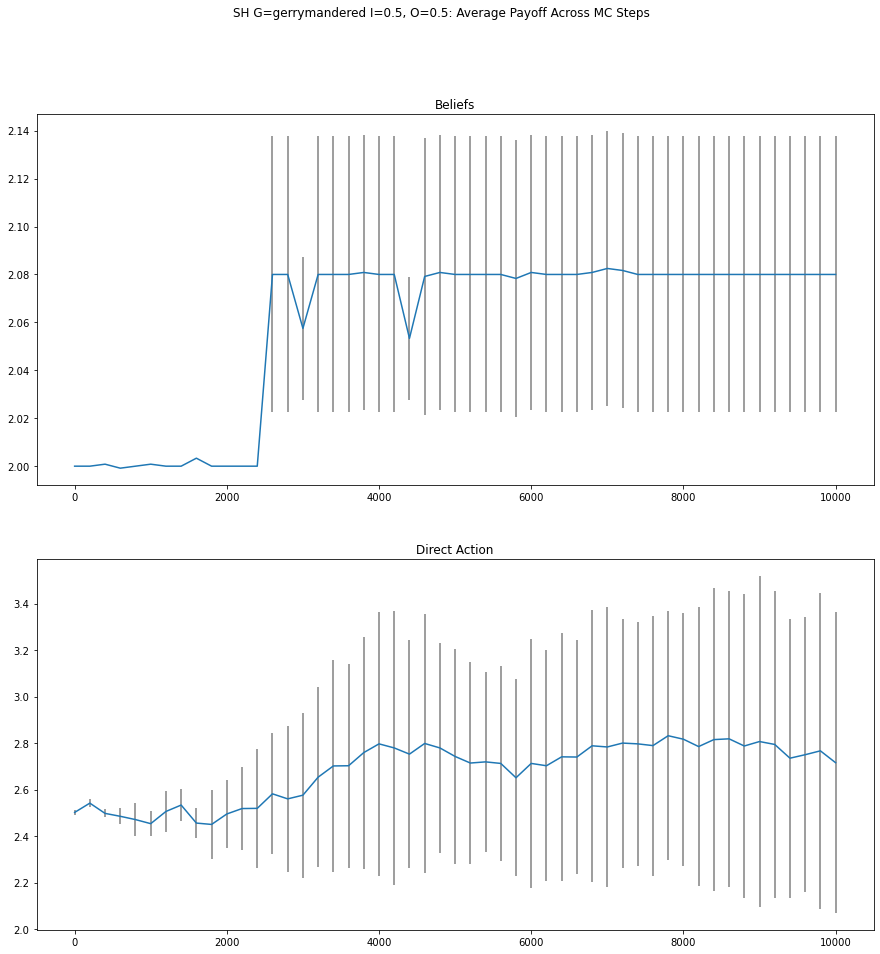

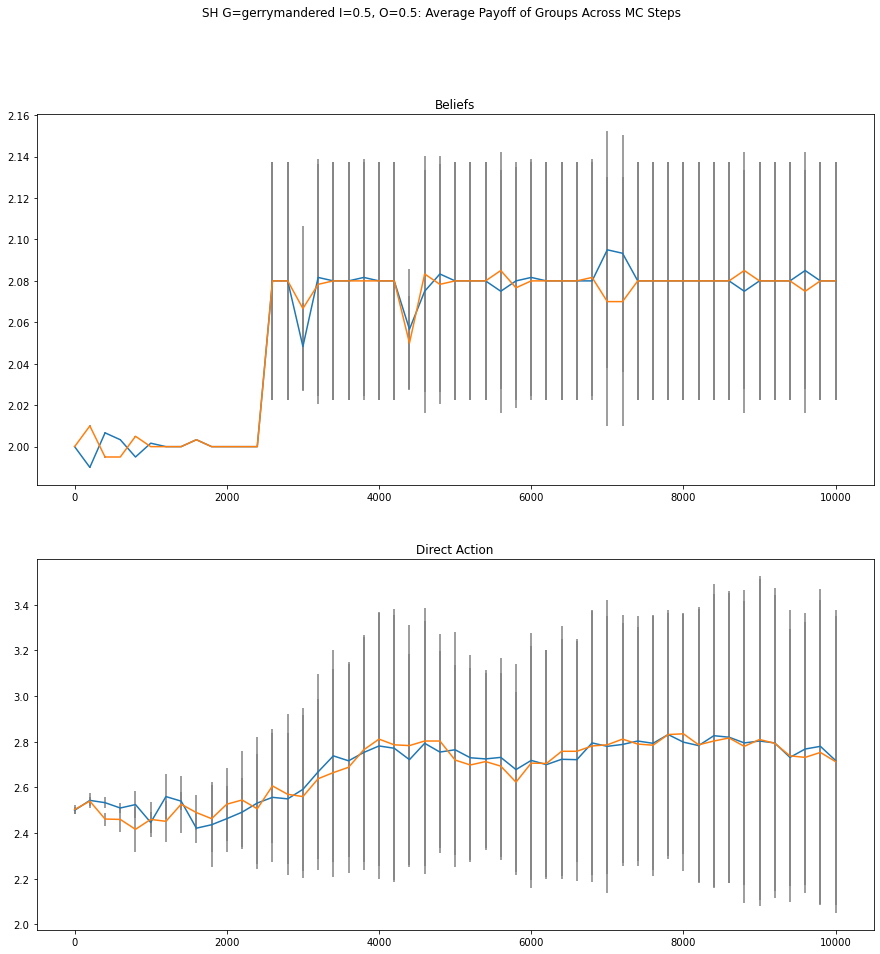

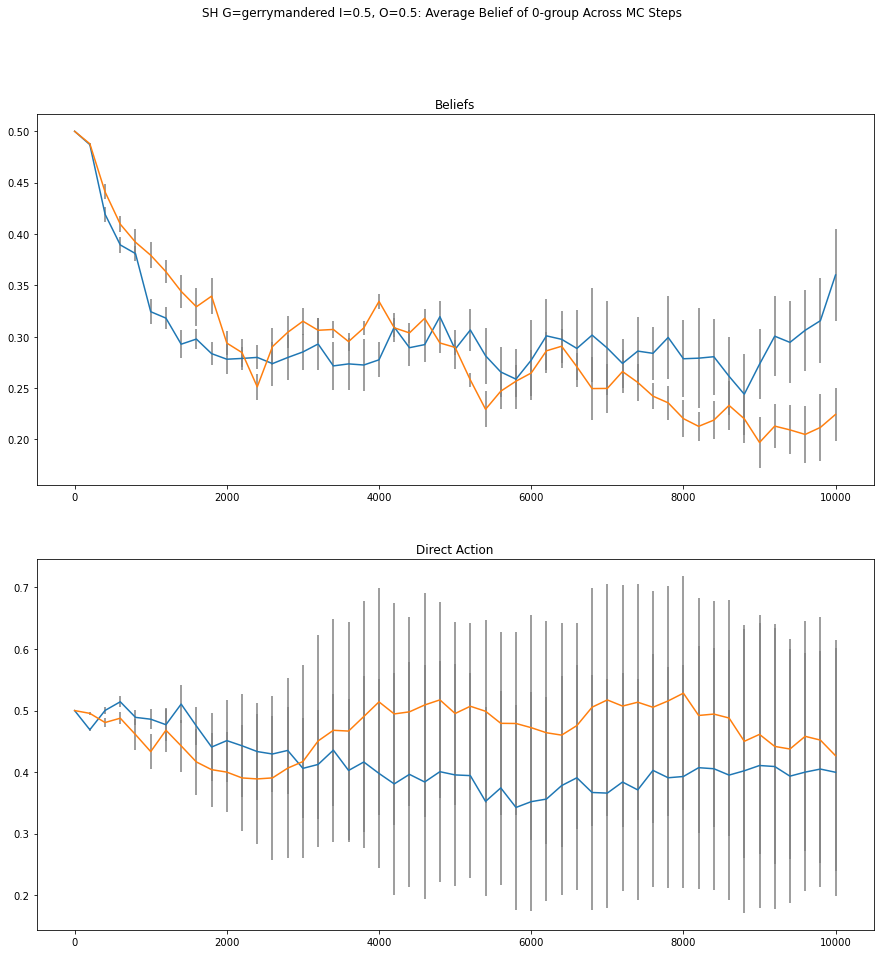

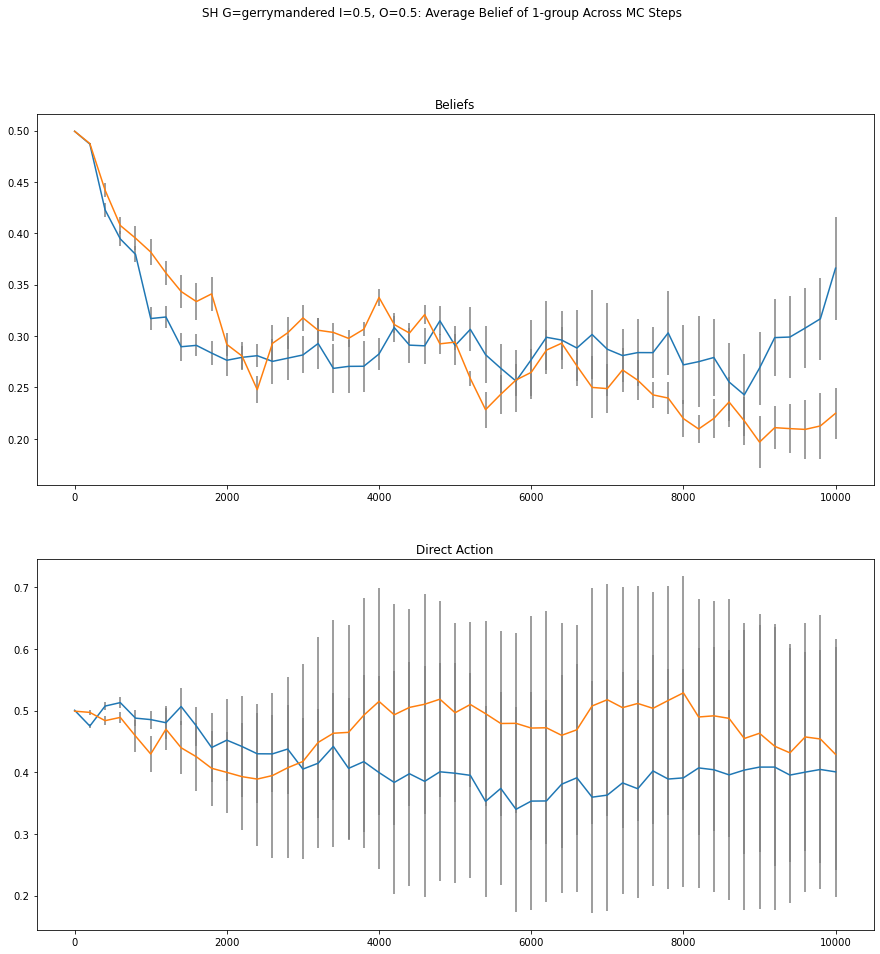

################## Graph = scale_free, Ingroup = 0.5, Outgroup = 0.5 ####################


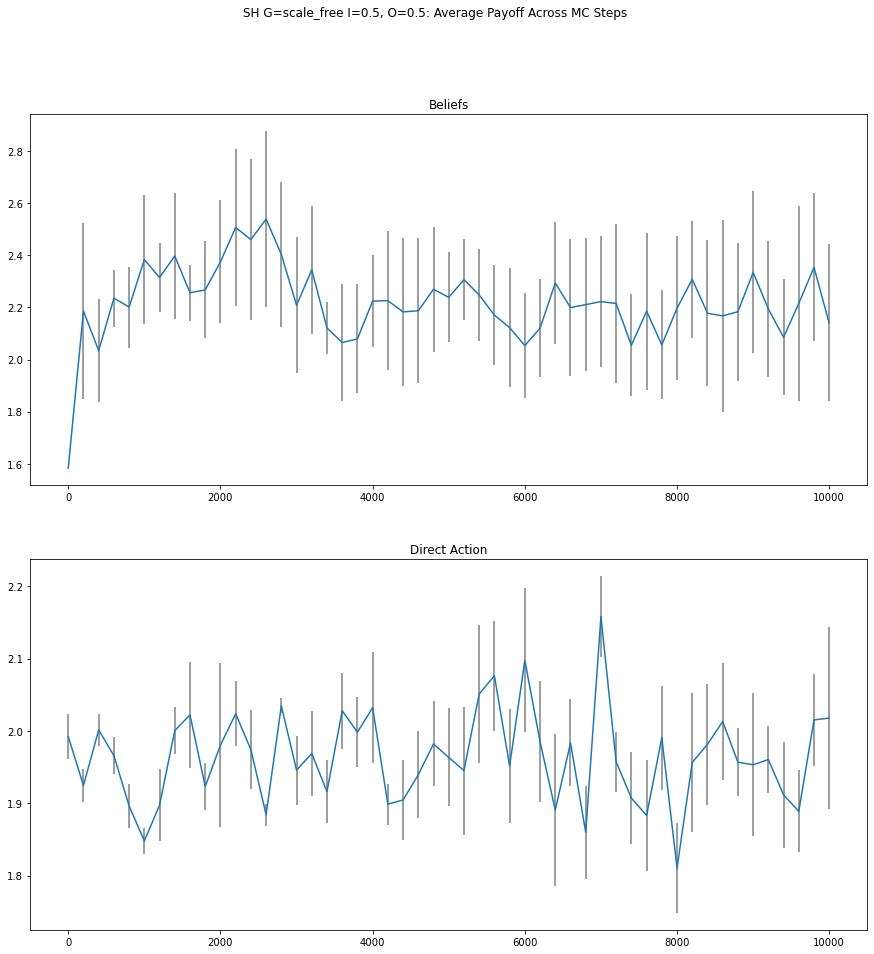

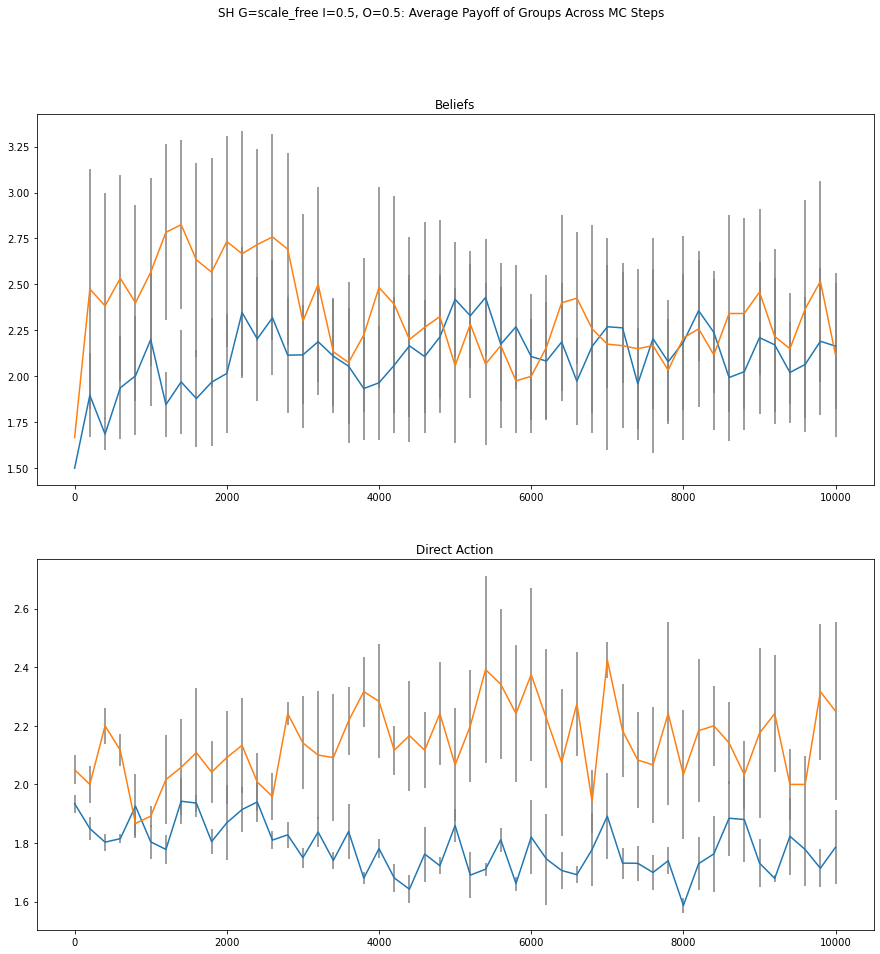

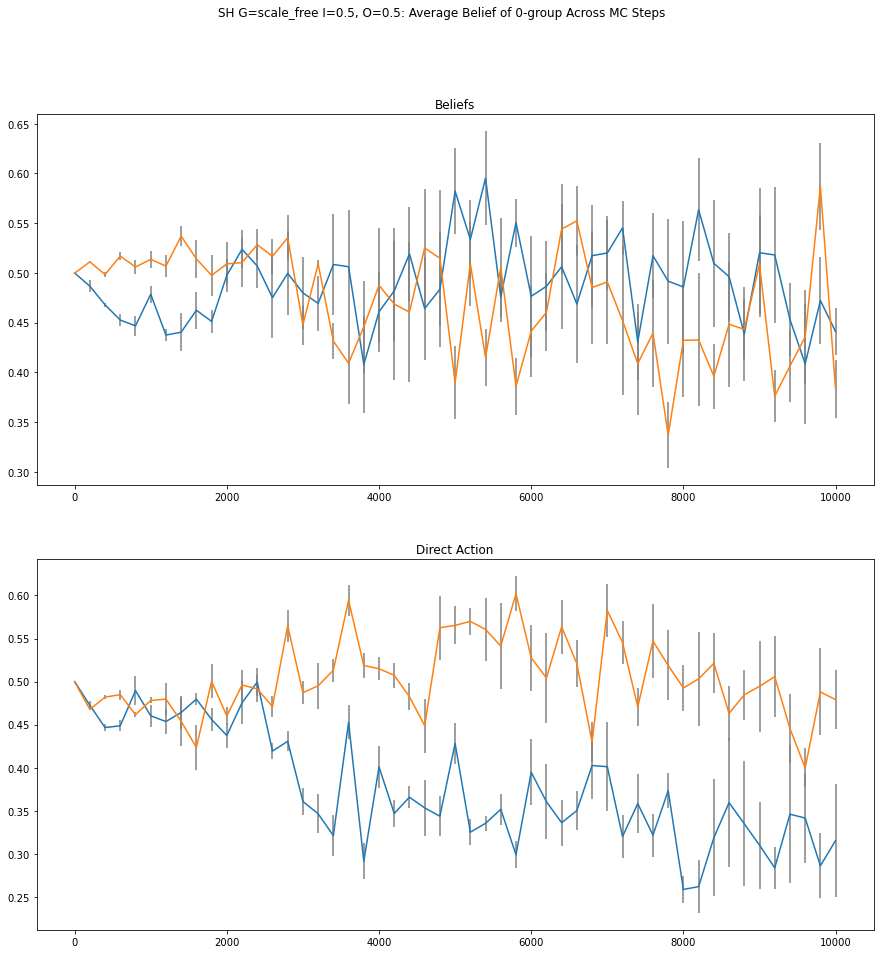

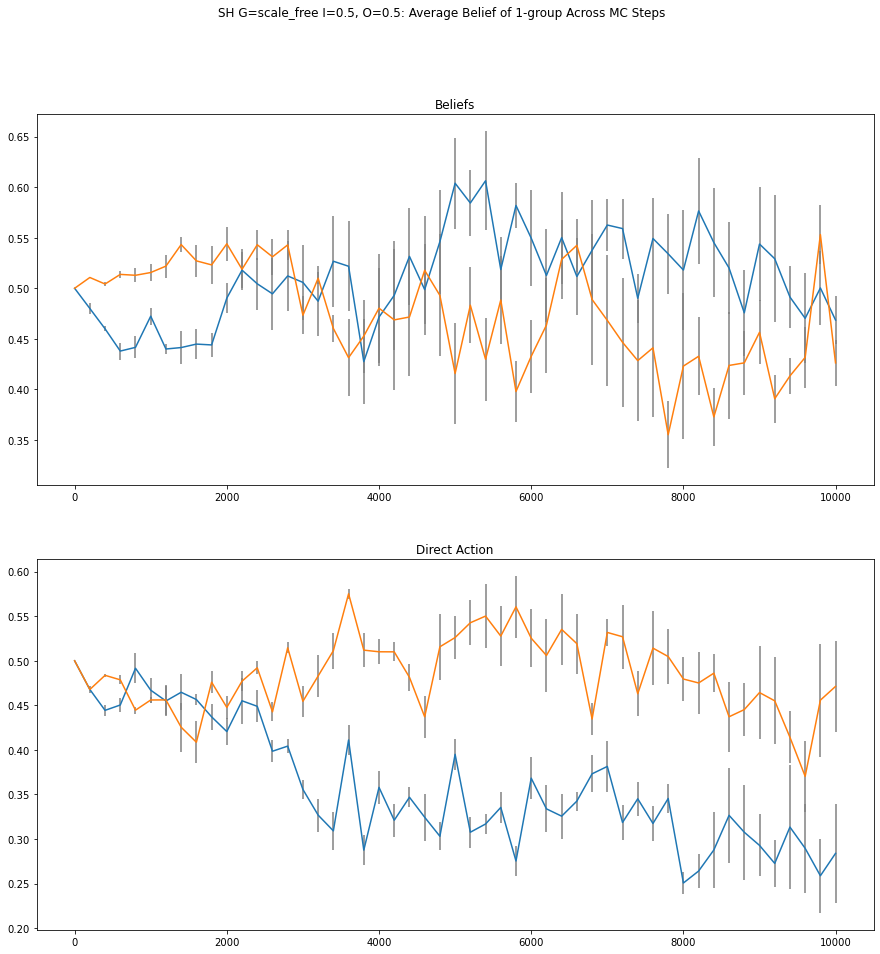

################## Graph = two_communities, Ingroup = 0.5, Outgroup = 0.5 ####################


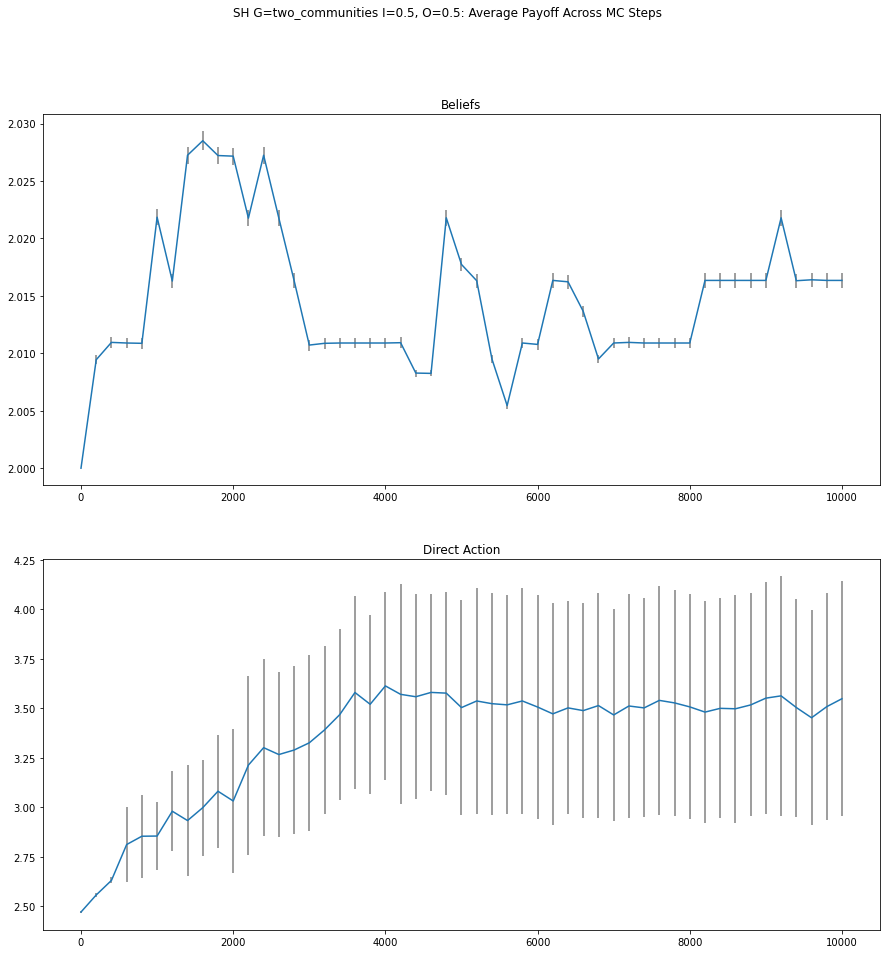

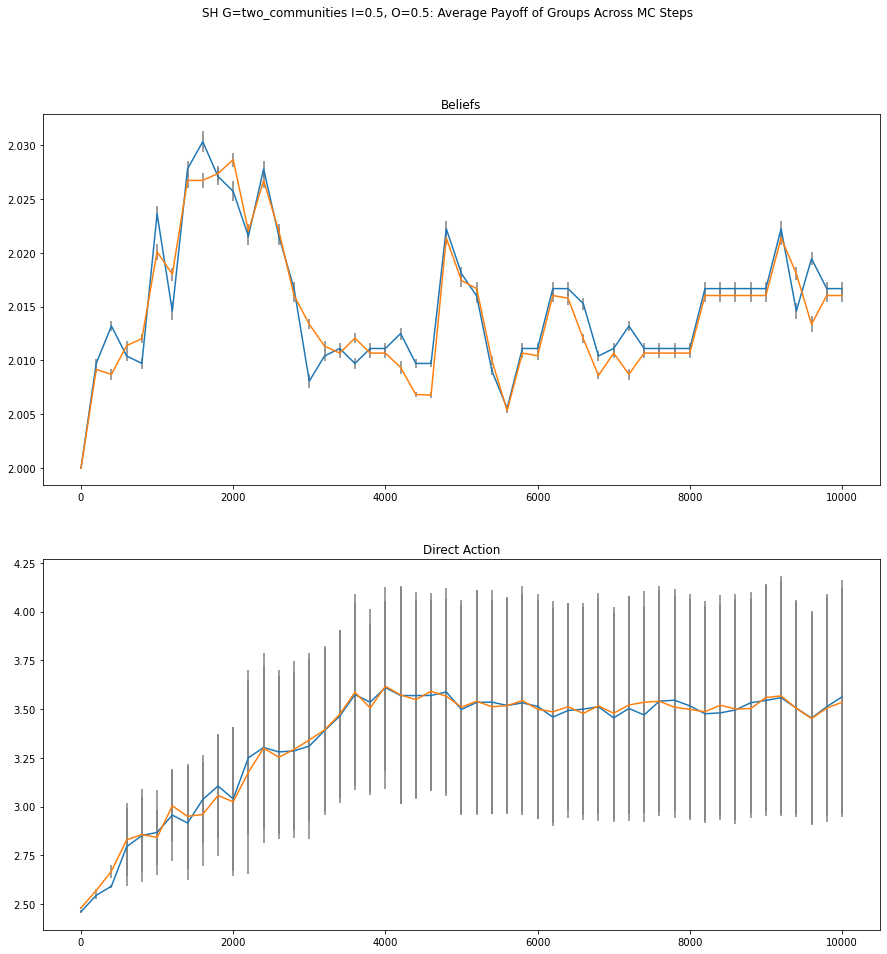

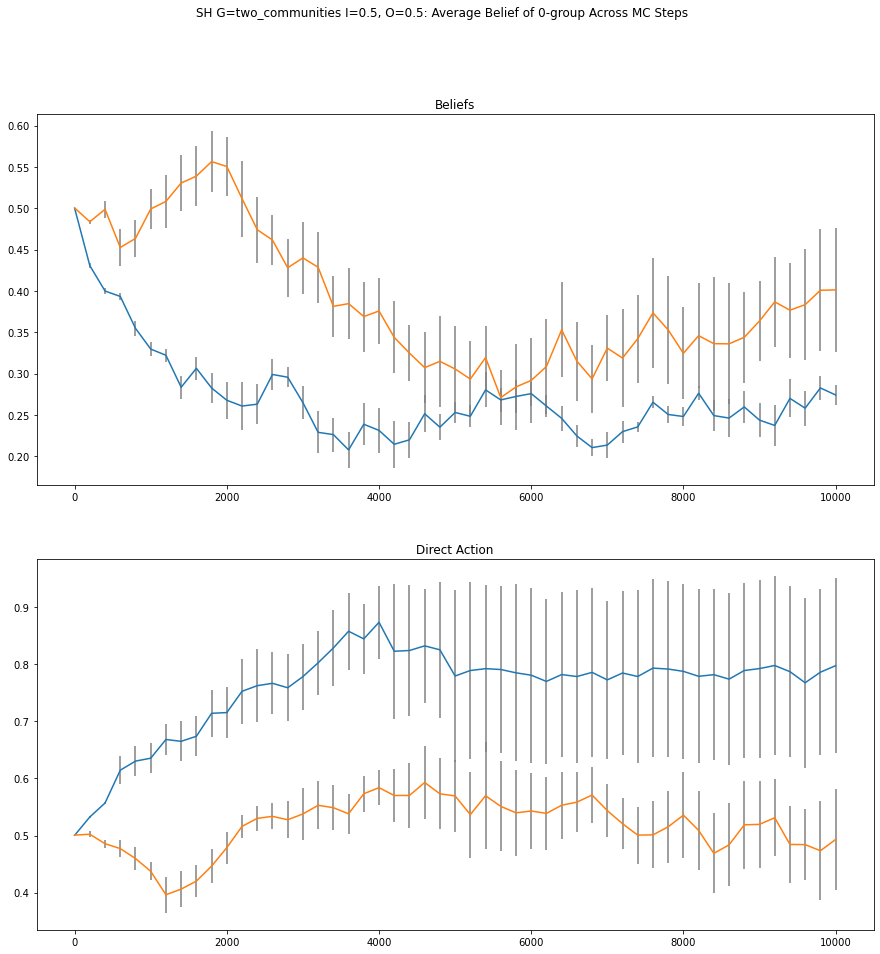

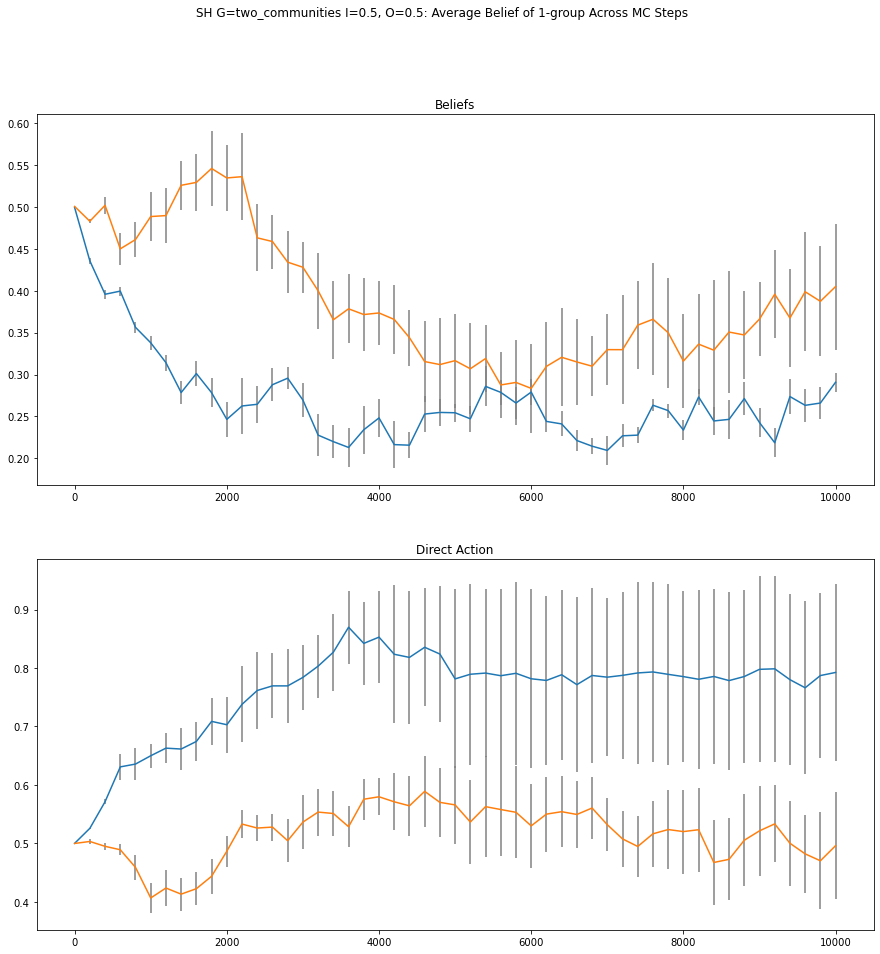

In [36]:
# Create graphs for all conditions
beliefs = [(0.99, 0.01), (0.9, 0.9), (0.5, 0.5)]
graphs = ['gerrymandered', 'scale_free', 'two_communities']

for ingroup, outgroup in beliefs:
    for graph in graphs:
        dataList_beliefs = []
        for datafile in glob.glob('results/*_{}_graph_{}_ingroup_{}_outgroup_{}*.csv'.format('beliefs', graph, ingroup, outgroup)):
            dataList_beliefs.append(pd.read_csv(datafile))

        df_beliefs = pd.concat(dataList_beliefs, axis=1, keys = range(len(dataList)))
        df_beliefs.index = df_beliefs.loc[:, pd.IndexSlice[2, 'T']]
        df_beliefs = df_beliefs.loc[:, pd.IndexSlice[:, 'P0':'O23']]
        df_beliefs = df_beliefs.rename_axis('T')

        mean_across_MC_steps_payoff_beliefs, variance_across_MC_steps_payoff_beliefs = mc_mean_variance(df_beliefs, 'P0', 'P23')

        mean_across_MC_steps_0_payoff_beliefs, variance_across_MC_steps_0_payoff_beliefs = mc_mean_variance(df_beliefs, 'P0', 'P11')
        mean_across_MC_steps_1_payoff_beliefs, variance_across_MC_steps_1_payoff_beliefs = mc_mean_variance(df_beliefs, 'P12', 'P23')

        mean_across_MC_steps_0_ingroup_beliefs, variance_across_MC_steps_0_ingroup_beliefs = mc_mean_variance(df_beliefs, 'I0', 'I11')
        mean_across_MC_steps_1_ingroup_beliefs, variance_across_MC_steps_1_ingroup_beliefs = mc_mean_variance(df_beliefs, 'I12', 'I23')

        mean_across_MC_steps_0_outgroup_beliefs, variance_across_MC_steps_0_outgroup_beliefs = mc_mean_variance(df_beliefs, 'O0', 'O11')
        mean_across_MC_steps_1_outgroup_beliefs, variance_across_MC_steps_1_outgroup_beliefs = mc_mean_variance(df_beliefs, 'O12', 'O23')

        dataList_direct_action = []
        for datafile in glob.glob('results/*_{}_graph_{}_ingroup_{}_outgroup_{}*.csv'.format('direct_action', graph, ingroup, outgroup)):
            dataList_direct_action.append(pd.read_csv(datafile))

        df_direct_action = pd.concat(dataList_direct_action, axis=1, keys = range(len(dataList)))
        df_direct_action.index = df_direct_action.loc[:, pd.IndexSlice[2, 'T']]
        df_direct_action = df_direct_action.loc[:, pd.IndexSlice[:, 'P0':'O23']]
        df_direct_action = df_direct_action.rename_axis('T')

        mean_across_MC_steps_payoff_direct_action, variance_across_MC_steps_payoff_direct_action = mc_mean_variance(df_direct_action, 'P0', 'P23')

        mean_across_MC_steps_0_payoff_direct_action, variance_across_MC_steps_0_payoff_direct_action = mc_mean_variance(df_direct_action, 'P0', 'P11')
        mean_across_MC_steps_1_payoff_direct_action, variance_across_MC_steps_1_payoff_direct_action = mc_mean_variance(df_direct_action, 'P12', 'P23')

        mean_across_MC_steps_0_ingroup_direct_action, variance_across_MC_steps_0_ingroup_direct_action = mc_mean_variance(df_direct_action, 'I0', 'I11')
        mean_across_MC_steps_1_ingroup_direct_action, variance_across_MC_steps_1_ingroup_direct_action = mc_mean_variance(df_direct_action, 'I12', 'I23')

        mean_across_MC_steps_0_outgroup_direct_action, variance_across_MC_steps_0_outgroup_direct_action = mc_mean_variance(df_direct_action, 'O0', 'O11')
        mean_across_MC_steps_1_outgroup_direct_action, variance_across_MC_steps_1_outgroup_direct_action = mc_mean_variance(df_direct_action, 'O12', 'O23')

        print("################## Graph = {}, Ingroup = {}, Outgroup = {} ####################".format(graph, ingroup, outgroup))

        fig, (ax1, ax2) = plt.subplots(2)
        fig.set_figheight(15)
        fig.set_figwidth(15)
        fig.suptitle("SH G={} I={}, O={}: Average Payoff Across MC Steps".format(graph, ingroup, outgroup))
        ax1.errorbar(list(df_beliefs.index), mean_across_MC_steps_payoff_beliefs, yerr=variance_across_MC_steps_payoff_beliefs, ecolor='gray')
        ax1.set_title('Beliefs')
        ax2.errorbar(list(df_beliefs.index), mean_across_MC_steps_payoff_direct_action, yerr=variance_across_MC_steps_payoff_direct_action, ecolor='gray')
        ax2.set_title('Direct Action')
        plt.show()

        fig, (ax1, ax2) = plt.subplots(2)
        fig.set_figheight(15)
        fig.set_figwidth(15)
        fig.suptitle("SH G={} I={}, O={}: Average Payoff of Groups Across MC Steps".format(graph, ingroup, outgroup))
        ax1.errorbar(list(df_beliefs.index), mean_across_MC_steps_0_payoff_beliefs, yerr=variance_across_MC_steps_0_payoff_beliefs, ecolor='gray', label="0-group")
        ax1.errorbar(list(df_beliefs.index), mean_across_MC_steps_1_payoff_beliefs, yerr=variance_across_MC_steps_1_payoff_beliefs, ecolor='gray', label="1-group")
        ax1.set_title('Beliefs')
        ax2.errorbar(list(df_beliefs.index), mean_across_MC_steps_0_payoff_direct_action, yerr=variance_across_MC_steps_0_payoff_direct_action, ecolor='gray', label="0-group")
        ax2.errorbar(list(df_beliefs.index), mean_across_MC_steps_1_payoff_direct_action, yerr=variance_across_MC_steps_1_payoff_direct_action, ecolor='gray', label="1-group")
        ax2.set_title('Direct Action')
        plt.show()

        fig, (ax1, ax2) = plt.subplots(2)
        fig.set_figheight(15)
        fig.set_figwidth(15)
        fig.suptitle("SH G={} I={}, O={}: Average Belief of 0-group Across MC Steps".format(graph, ingroup, outgroup))
        ax1.errorbar(list(df_beliefs.index), mean_across_MC_steps_0_ingroup_beliefs, yerr=variance_across_MC_steps_0_ingroup_beliefs, ecolor='gray', label="Ingroup Belief")
        ax1.errorbar(list(df_beliefs.index), mean_across_MC_steps_0_outgroup_beliefs, yerr=variance_across_MC_steps_0_outgroup_beliefs, ecolor='gray', label="Outgroup Belief")
        ax1.set_title('Beliefs')
        ax2.errorbar(list(df_beliefs.index), mean_across_MC_steps_0_ingroup_direct_action, yerr=variance_across_MC_steps_0_ingroup_direct_action, ecolor='gray', label="Ingroup Belief")
        ax2.errorbar(list(df_beliefs.index), mean_across_MC_steps_0_outgroup_direct_action, yerr=variance_across_MC_steps_0_outgroup_direct_action, ecolor='gray', label="Outgroup Belief")
        ax2.set_title('Direct Action')
        plt.show()

        fig, (ax1, ax2) = plt.subplots(2)
        fig.set_figheight(15)
        fig.set_figwidth(15)
        fig.suptitle("SH G={} I={}, O={}: Average Belief of 1-group Across MC Steps".format(graph, ingroup, outgroup))
        ax1.errorbar(list(df_beliefs.index), mean_across_MC_steps_1_ingroup_beliefs, yerr=variance_across_MC_steps_1_ingroup_beliefs, ecolor='gray', label="Ingroup Belief")
        ax1.errorbar(list(df_beliefs.index), mean_across_MC_steps_1_outgroup_beliefs, yerr=variance_across_MC_steps_1_outgroup_beliefs, ecolor='gray', label="Outgroup Belief")
        ax1.set_title('Beliefs')
        ax2.errorbar(list(df_beliefs.index), mean_across_MC_steps_1_ingroup_direct_action, yerr=variance_across_MC_steps_1_ingroup_direct_action, ecolor='gray', label="Ingroup Belief")
        ax2.errorbar(list(df_beliefs.index), mean_across_MC_steps_1_outgroup_direct_action, yerr=variance_across_MC_steps_1_outgroup_direct_action, ecolor='gray', label="Outgroup Belief")
        ax2.set_title('Direct Action')
        plt.show()